# Notebook destinado a Parte 3 - Validação Holdout em Problema Não-Linearmente Separável
## Colaboradores: Jakson Protázio, Nadine Brito e Lucas Araújo

Novamente importaremos as bibliotecas e inicializaremos as entradas.

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
dataset=np.fromfile('data/dataHoldout.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 ...
 [ 0.65980493  1.05876739  0.        ]
 [ 1.09867123  0.87404891  0.        ]
 [ 0.72930655  0.93224271  0.        ]]


Plotaremos o gráfico inicial da base de dados mostrando como ele não é linearmente separável.

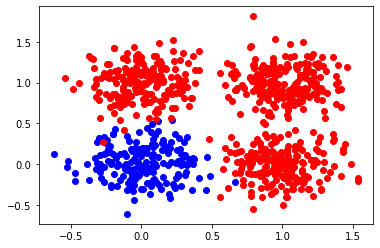

In [19]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(dataset)):
    if(dataset[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[dataset[i,0]])
        resultado_0y = np.append(resultado_0y,[dataset[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[dataset[i,0]])
        resultado_1y = np.append(resultado_1y, [dataset[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

plt.show()

Nessa etapa, iremos dividir a base de dados em um conjunto de treinamento (70%) e um conjunto de teste (30%).

In [20]:
random.shuffle(dataset)
n_training = int(0.7*(len(dataset)))
training, test = dataset[:n_training,:], dataset[n_training:,:]

for i in range (0, len(test)):
    test[i,0] = float(test[i,0])
    test[i,1] = float(test[i,1])
    test[i,2] = float(test[i,2])

[ 0.99085047 -0.26727656  0.        ]


Definidos os conjuntos de treinamento e de teste, será dado início a criação das funções responsáveis pelo aprendizado do neurônio.

In [21]:
def iniciar_pesos(inicio,fim):
    pesos = np.array([random.uniform(inicio,fim),random.uniform(inicio,fim),random.uniform(inicio,fim)])
    return pesos

In [22]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

In [23]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0

In [24]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos + np.dot(mult,x)
    return result

In [25]:
def aprender(pesos):
    n = len(training)

    for i in range(0,n):
        soma_saida = soma(np.array([-1, training[i,0], training[i,1]]),pesos) 
        y = ativacao(soma_saida)
        
        if(y != training[i,2]):
            pesos = ajusta(pesos,training[i,2],y,np.array([-1, training[i,0], training[i,1]]))
    return pesos

In [26]:
pesos = iniciar_pesos(-0.5,0.5)

In [27]:
for i in range(0,100):
    resultado = aprender(pesos)
    pesos = resultado
    np.random.shuffle(training)  

Depois do treinamento usaremos as saídas treinadas e as saídas de teste para gerar os gráficos e as respostas das questões levantadas no enunciado do projeto.

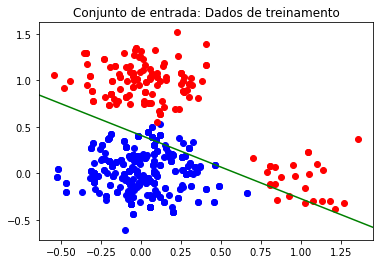

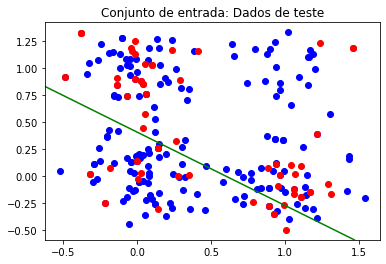

In [28]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(training)):
    if(training[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[training[i,0]])
        resultado_0y = np.append(resultado_0y,[training[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[training[i,0]])
        resultado_1y = np.append(resultado_1y, [training[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

x2 = (pesos[0]/pesos[2])
x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 

plt.title('Conjunto de entrada: Dados de treinamento')
plt.axline([x1,0],[0,x2],color='green')
plt.show()

#------------------------------------

resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(test)):
    if(training[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[test[i,0]])
        resultado_0y = np.append(resultado_0y,[test[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[test[i,0]])
        resultado_1y = np.append(resultado_1y, [test[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

x2 = (pesos[0]/pesos[2])
x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 

plt.title('Conjunto de entrada: Dados de teste')
plt.axline([x1,0],[0,x2],color='green')
plt.show()


## Realizando Testes

A matriz de confusão prevista do neurônio é a seguinte:

In [29]:
matriz_conf = np.zeros((2,2))
for i in range(0,len(test)):
    soma_saida = soma(np.array([-1, test[i,0], test[i,1]]),pesos) 
    y = ativacao(soma_saida)
    
    if(y==1 and test[i,2]==1):
        matriz_conf[0][0]+=1
    elif(y==1 and test[i,2]==0):
        matriz_conf[0][1]+=1
    elif(y==0 and test[i,2]==0):
        matriz_conf[1][1]+=1
    elif(y==0 and test[i,2]==1):
        matriz_conf[1][0]+=1
            
print(matriz_conf) 

[[ 76.  14.]
 [  7. 143.]]


Para realizar as métricas de avaliação os valores das variáveis True Positive (TP), True False (TF), False Positive (FP) e False Negativa (FN) foram inicializados.

In [30]:
tp= matriz_conf[0][0]
tn= matriz_conf[1][1]
fp=matriz_conf[0][1]
fn=matriz_conf[1][0]

Baseada na matriz de confusão mostrada anteriormente, a acurácia aprensetada é:

In [31]:
acuracia = ((tp+tn)/(tp+tn+fp+fn))

print(acuracia)

0.9125


Seguindo com as métricas de avaliação dos neurônio obtemos os seguintes valores para **precisão**, **revocação** e **F-Score**

In [32]:
prec = (tp/(tp+fp))
rev= (tp/(tp+fn))
fscore=(2*(prec*rev)/prec*rev)

print("O valor da Precisão é:",prec)
print("O valor da Revocação é:",rev)
print("O valor do F-Score é:",fscore)

O valor da Precisão é: 0.8444444444444444
O valor da Revocação é: 0.9156626506024096
O valor do F-Score é: 1.6768761794164608
